<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/Mean_Based_Risk_measurement_with_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [286]:
row = 9

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation



In [288]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

top_features = ['COH.A.delta.a.FP1.b.FP2', 'COH.A.delta.f.F4.h.T3',
                   'AB.C.alpha.q.T6', 'AB.B.theta.c.F7']
data1 = pd.read_csv('/content/Sheet 1-numericBehaviorWithAgeOnly.csv')

Y = data1['specific_disorder']
X = data1[top_features]

Y = data1['specific_disorder'] == 5

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.647229
         Iterations 5


In [289]:
risk = 0

                                0         1
const                    0.599081  1.180958
COH.A.delta.a.FP1.b.FP2 -0.009408 -0.001583


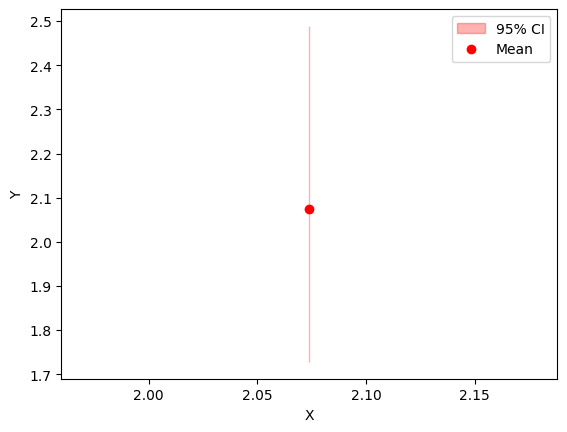

exp CI_lower: 0    1.727943
Name: mean_ci_lower, dtype: float64
exp CI_upper: 0    2.489112
Name: mean_ci_upper, dtype: float64
mean: 0.7294288951957859
exp mean:2.073895857510405
1.0738958575104052
risk:1.0738958575104052


In [290]:
#COH.A.delta.a.FP1.b.FP2
Y = data1['specific_disorder'] == 5
X = data1['COH.A.delta.a.FP1.b.FP2']

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 5 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.OLS(Y, X_with_const)
result = logit_model.fit()


prediction_data = pd.read_csv('/content/10 test subjects.csv')
first_row_value = prediction_data['COH.A.delta.a.FP1.b.FP2'].iloc[row]
pred_df = pd.DataFrame({'const': [1], 'COH.A.delta.a.FP1.b.FP2': [first_row_value]})
pred = result.get_prediction(pred_df)

pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals

ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']
pi_lower = pred_summary['obs_ci_lower']
pi_upper = pred_summary['obs_ci_upper']
conf_intervals = result.conf_int()
print(conf_intervals)


# Plot the data
#plt.scatter(X, Y, label='Data') #y changed to Y
mean = pred_summary['mean']
plt.plot(X=1,Y=mean)
#plt.plot(X, result.fittedvalues, color='red', label='Fitted Line')
#plt.plot(ci_lower, ci_upper, color='red', label='Fitted Line')
mean = np.exp(pred_summary['mean'])
plt.plot(X=1,Y=mean)
plt.fill_between(mean, np.exp(ci_lower), np.exp(ci_upper), color='red', alpha=0.3, label='95% CI')
plt.plot(mean, mean[0], 'ro', label='Mean')
#plt.fill_between(X, pi_lower, pi_upper, color='blue', alpha=0.2, label='95% PI')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print('exp CI_lower: ' + str(np.exp(ci_lower)))
print('exp CI_upper: ' + str(np.exp(ci_upper)))


risk1 = pred.predicted_mean[0]
#will use risk1_1 when adding all the risk mean values to find the total CI
risk1_1 = risk1

print('mean: ' + str(risk1))
risk1 = np.exp(risk1)
print('exp mean:' + str(risk1))

if risk1<1:
  risk1 = 1-risk1
else:
  risk1 = risk1-1
print(risk1)


print('risk:' +  str(risk1))

                              0         1
const                  0.298102  0.615066
COH.A.delta.f.F4.h.T3 -0.003773  0.006565


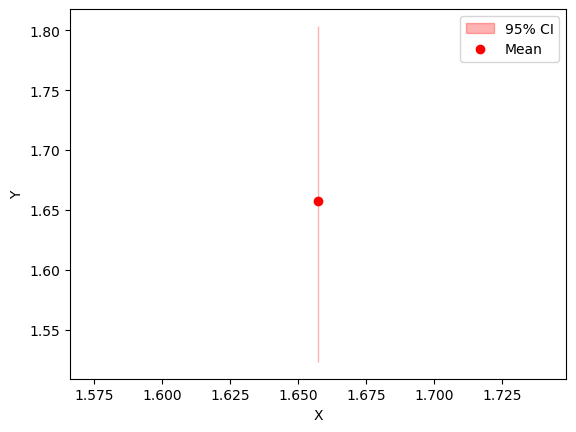

exp CI_lower: 0    1.523063
Name: mean_ci_lower, dtype: float64
exp CI_upper: 0    1.803642
Name: mean_ci_upper, dtype: float64
mean: 0.5052658430913178
exp mean:1.6574260771707632
risk:1.6574260771707632


In [291]:
#COH.A.delta.f.F4.h.T3
Y = data1['specific_disorder']
X = data1['COH.A.delta.f.F4.h.T3']

y = data1['specific_disorder'].apply(lambda x: 1 if x == 5 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.OLS(y, X_with_const)
result = logit_model.fit()

prediction_data = pd.read_csv('/content/10 test subjects.csv')
first_row_value = prediction_data['COH.A.delta.f.F4.h.T3'].iloc[row]
pred_df = pd.DataFrame({'const': [1], 'COH.A.delta.f.F4.h.T3': [first_row_value]})
pred = result.get_prediction(pred_df)

pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals

ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']
pi_lower = pred_summary['obs_ci_lower']
pi_upper = pred_summary['obs_ci_upper']
conf_intervals = result.conf_int()
print(conf_intervals)


mean = pred_summary['mean']
mean1 = mean
plt.plot(X=1,Y=mean)

mean = np.exp(pred_summary['mean'])
plt.plot(X=1,Y=mean)
plt.fill_between(mean, np.exp(ci_lower), np.exp(ci_upper), color='red', alpha=0.3, label='95% CI')
plt.plot(mean, mean[0], 'ro', label='Mean')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print('exp CI_lower: ' + str(np.exp(ci_lower)))
print('exp CI_upper: ' + str(np.exp(ci_upper)))


risk2 = pred.predicted_mean[0]
#will use risk2_2 when adding all the risk mean values to find the total CI
risk2_2 = risk2


print('mean: ' + str(risk2))
risk2 = np.exp(risk2)
print('exp mean:' + str(risk2))

print('risk:' +  str(risk2))

                        0         1
const            0.441272  0.627323
AB.C.alpha.q.T6 -0.005221  0.000894


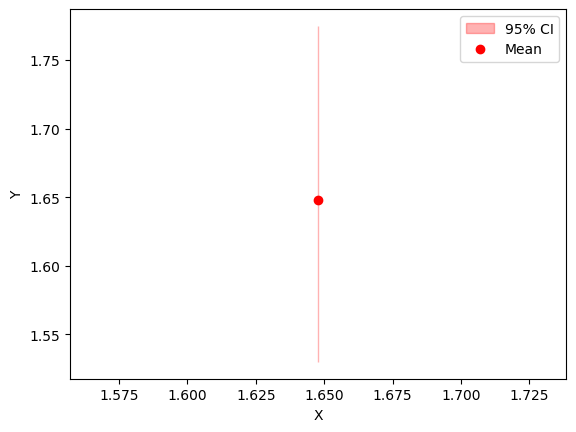

exp CI_lower: 0    1.529792
Name: mean_ci_lower, dtype: float64
exp CI_upper: 0    1.774921
Name: mean_ci_upper, dtype: float64
mean: 0.49944370647186626
exp mean:1.647804352788937
risk:1.647804352788937


In [293]:
#AB.C.alpha.q.T6
Y = data1['specific_disorder']
X = data1['AB.C.alpha.q.T6']

y = data1['specific_disorder'].apply(lambda x: 1 if x == 5 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.OLS(y, X_with_const)
result = logit_model.fit()

prediction_data = pd.read_csv('/content/10 test subjects.csv')
first_row_value = prediction_data['AB.C.alpha.q.T6'].iloc[row]
pred_df = pd.DataFrame({'const': [1], 'AB.C.alpha.q.T6': [first_row_value]})
pred = result.get_prediction(pred_df)

pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals

ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']
pi_lower = pred_summary['obs_ci_lower']
pi_upper = pred_summary['obs_ci_upper']
conf_intervals = result.conf_int()
print(conf_intervals)

mean = pred_summary['mean']
mean2 = mean
plt.plot(X=1,Y=mean)

mean = np.exp(pred_summary['mean'])
mean3 = mean

plt.plot(X=1,Y=mean)
plt.fill_between(mean, np.exp(ci_lower), np.exp(ci_upper), color='red', alpha=0.3, label='95% CI')
plt.plot(mean, mean[0], 'ro', label='Mean')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print('exp CI_lower: ' + str(np.exp(ci_lower)))
print('exp CI_upper: ' + str(np.exp(ci_upper)))


risk3 = pred.predicted_mean[0]
#will use risk3_3 when adding all the risk mean values to find the total CI
risk3_3 = risk3

print('mean: ' + str(risk3))
risk3 = np.exp(risk3)
print('exp mean:' + str(risk3))

print('risk:' +  str(risk3))

                        0         1
const            0.294033  0.563769
AB.B.theta.c.F7 -0.004972  0.018764


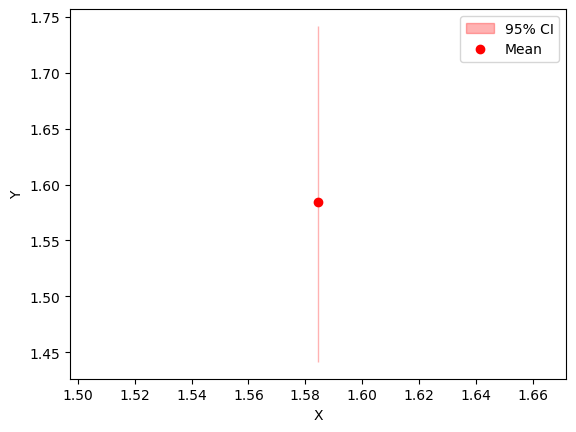

exp CI_lower: 0    1.441576
Name: mean_ci_lower, dtype: float64
exp CI_upper: 0    1.741602
Name: mean_ci_upper, dtype: float64
mean: 0.46027126557026027
exp mean:1.5845037480146758
risk:1.5845037480146758


In [294]:
#AB.B.theta.c.F7
Y = data1['specific_disorder']
X = data1['AB.B.theta.c.F7']

y = data1['specific_disorder'].apply(lambda x: 1 if x == 5 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.OLS(y, X_with_const)
result = logit_model.fit()

prediction_data = pd.read_csv('/content/10 test subjects.csv')
first_row_value = prediction_data['AB.B.theta.c.F7'].iloc[row]
pred_df = pd.DataFrame({'const': [1], 'AB.B.theta.c.F7': [first_row_value]})
pred = result.get_prediction(pred_df)

pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals

ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']
pi_lower = pred_summary['obs_ci_lower']
pi_upper = pred_summary['obs_ci_upper']
conf_intervals = result.conf_int()
print(conf_intervals)

mean = pred_summary['mean']
mean4 = mean
plt.plot(X=1,Y=mean)

mean = np.exp(pred_summary['mean'])
plt.plot(X=1,Y=mean)
plt.fill_between(mean, np.exp(ci_lower), np.exp(ci_upper), color='red', alpha=0.3, label='95% CI')
plt.plot(mean, mean[0], 'ro', label='Mean')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print('exp CI_lower: ' + str(np.exp(ci_lower)))
print('exp CI_upper: ' + str(np.exp(ci_upper)))


risk4 = pred.predicted_mean[0]
#will use risk4_4 when adding all the risk mean values to find the total CI
risk4_4 = risk4


print('mean: ' + str(risk4))
risk4 = np.exp(risk4)
print('exp mean:' + str(risk4))

print('risk:' +  str(risk4))

In [297]:
risk = risk1 + risk2 + risk3 + risk4
risk = risk/4
print(risk)
if risk > 1:
  prediction_val = (risk-1)*100
  print("You are " + str(prediction_val) + "% more likely to have behavioral disorder")

else:
  prediction_val = (1-risk)*100
  print("You are " + str(prediction_val) + " % less likely to have behavioral disorder")


'''test subject true condition - output
healthy - 46% more likely
healthy - 39% more likely
healthy - 35% more likely
healthy - 36% more likely
healthy - 40% more likely
disorder - 38% more likely
disorder - 38% more likely
disorder - 43% more likely
disorder - 39% more likely
disorder - 49% more likely

'''
std_dev = np.std([mean1.to_numpy(), mean2.to_numpy(), mean3.to_numpy(), mean4.to_numpy()])
print('std_dev: ' + str(std_dev))


1.4909075088711954
You are 49.09075088711954% more likely to have behavioral disorder
std_dev: 0.5023665334443469


In [ ]:
risk = risk1_1 + risk2_2 + risk3_3 + risk4_4
print(risk4_4)
risk = risk/4
print(risk)

if risk<0.5:
  print("you are not at risk of IAD")

if risk>0.5:
  print("you are at risk of IAD")

#incorrect output row index 0, 5, 6, 7, 8, 9

In [ ]:
#INCORRECT SHOULDN't SUBTRACT FROM 0.5 AGAIN

risk = risk1 + risk2 + risk3 + risk4
print(risk)
if risk > 0.5:
  prediction_val = (risk-0.5)*100
  print("You are " + str(prediction_val) + "% more likely to have behavioral disorder")

else:
  prediction_val = (0.5-(risk))*100
  print("You are " + str(prediction_val) + " % less likely to have behavioral disorder")